In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings            
warnings.filterwarnings("ignore")

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load the dataset
df = pd.read_csv("F:\OneDrive - University of Hertfordshire\DS Project\imdb_movie_dataset.csv")

In [4]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
df.shape

(1000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
# Define the imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

In [9]:
# Select only the columns that need imputation
columns_to_impute = ['Revenue (Millions)', 'Metascore']

In [10]:
# Apply the imputer to those columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [11]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [12]:
df.duplicated().sum()

0

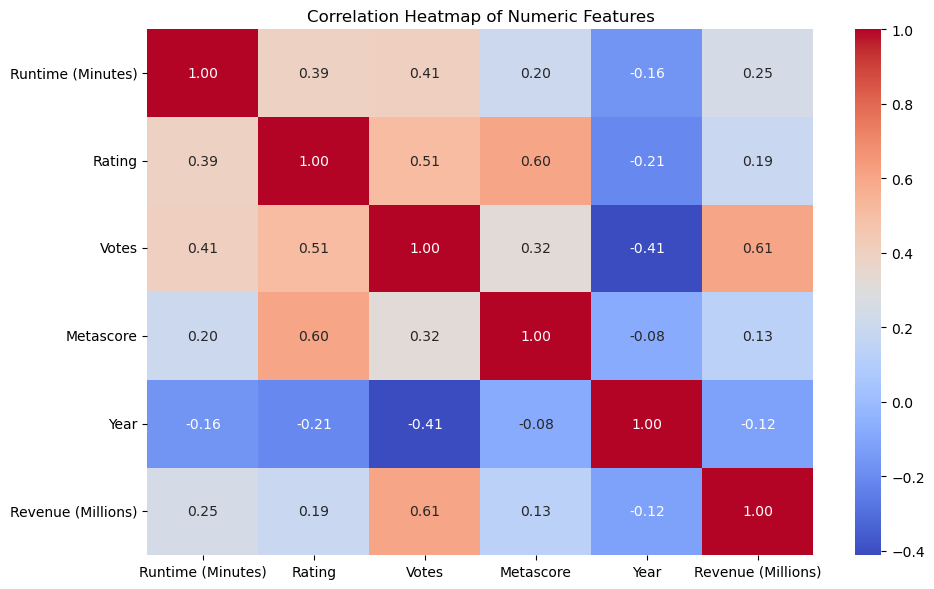

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Year', 'Revenue (Millions)']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

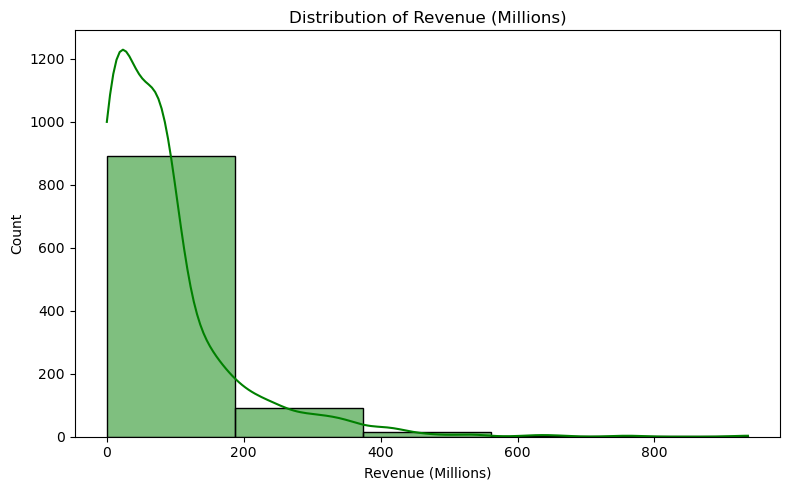

In [14]:
# Distribution of Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue (Millions)'], bins=5, kde=True, color='green')
plt.title("Distribution of Revenue (Millions)")
plt.xlabel("Revenue (Millions)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [15]:
# Feature Engineering: Extract main genre
df['MainGenre'] = df['Genre'].apply(lambda x: x.split(',')[0])

In [16]:
# Feature Engineering: Top 10 directors
top_directors = df['Director'].value_counts().nlargest(10).index
df['TopDirector'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')

In [17]:
# Feature Engineering: Top 10 actors (first actor in list)
df['LeadActor'] = df['Actors'].apply(lambda x: x.split(',')[0])
top_actors = df['LeadActor'].value_counts().nlargest(10).index
df['TopActor'] = df['LeadActor'].apply(lambda x: x if x in top_actors else 'Other')

In [18]:
# Select features
features = ['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Year',
            'MainGenre', 'TopDirector', 'TopActor']

In [19]:
X = df[features]
y = df['Revenue (Millions)']

In [20]:
# Categorical & numerical features
categorical = ['MainGenre', 'TopDirector', 'TopActor']
numerical = ['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Year']

In [21]:
# Preprocessing and modeling pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [23]:
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [24]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [25]:
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

MAE: 51.7493912543183


In [26]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

RMSE: 69.16814448044401


In [27]:
print("R2 Score:", r2_score(y_test, y_pred_lr))

R2 Score: 0.4884901344352204


In [32]:
residuals = y_test - y_pred_lr
residual_rate = residuals / y_test
print("Mean Residual Rate:", residual_rate.mean())
print("Median Residual Rate:", residual_rate.median())
print("Residual Rate Std Dev:", residual_rate.std())

Mean Residual Rate: -96.84835921261597
Median Residual Rate: -0.2561723072636641
Residual Rate Std Dev: 553.3043138160984


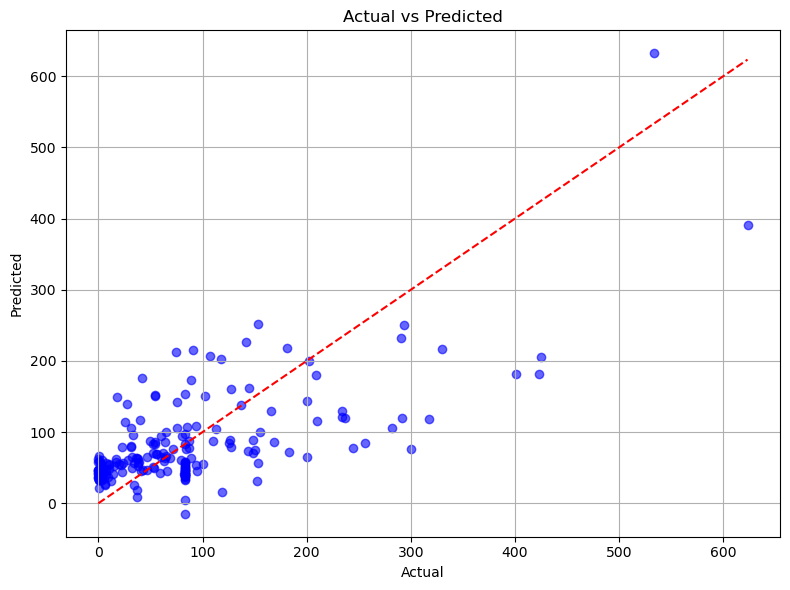

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

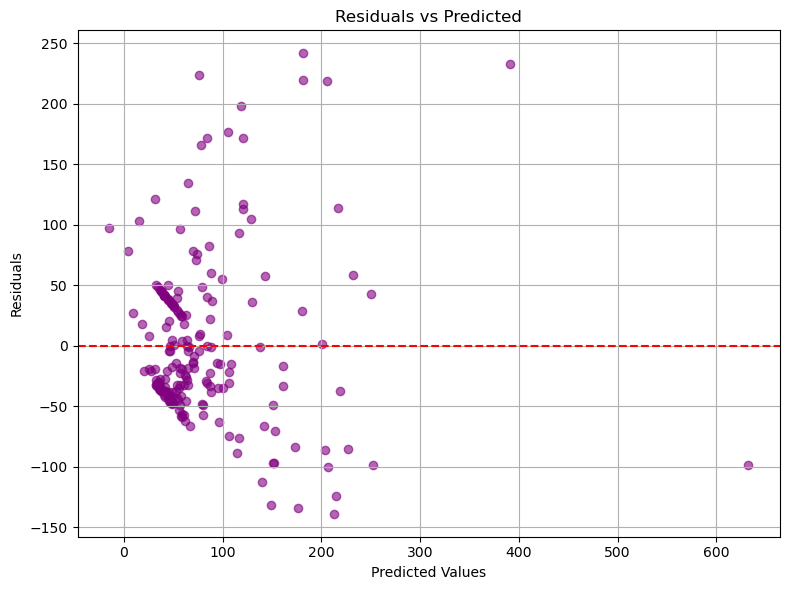

In [29]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

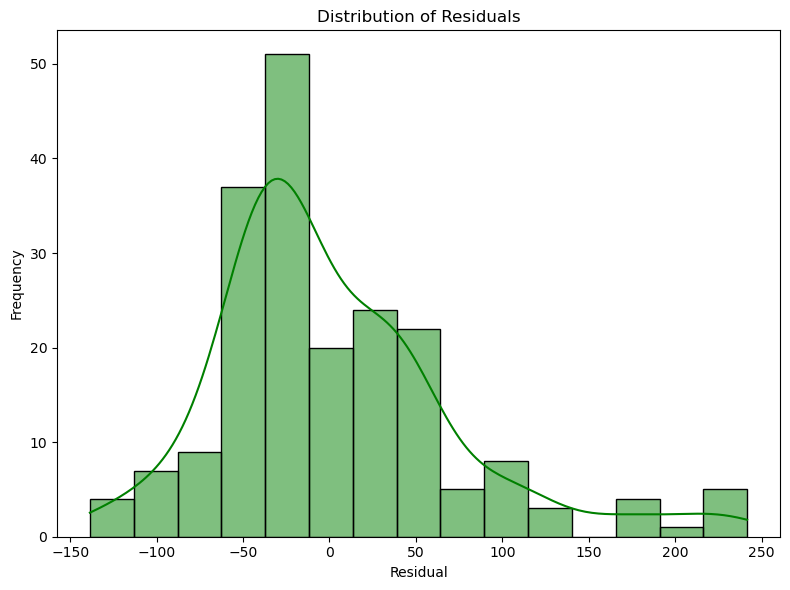

In [30]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create pipeline with preprocessing and decision tree model
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', DecisionTreeRegressor(random_state=42, max_depth=5))  
])

# Fit model
model_dt.fit(X_train, y_train)

# Predict
y_pred_dt = model_dt.predict(X_test)

# Evaluate performance
print("Decision Tree Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Performance:
MAE: 54.24761927485626
RMSE: 76.17802014946847
R² Score: 0.37955808987673456


# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 47.27396242426541
RMSE: 68.12380621165724
R² Score: 0.5038196359257291


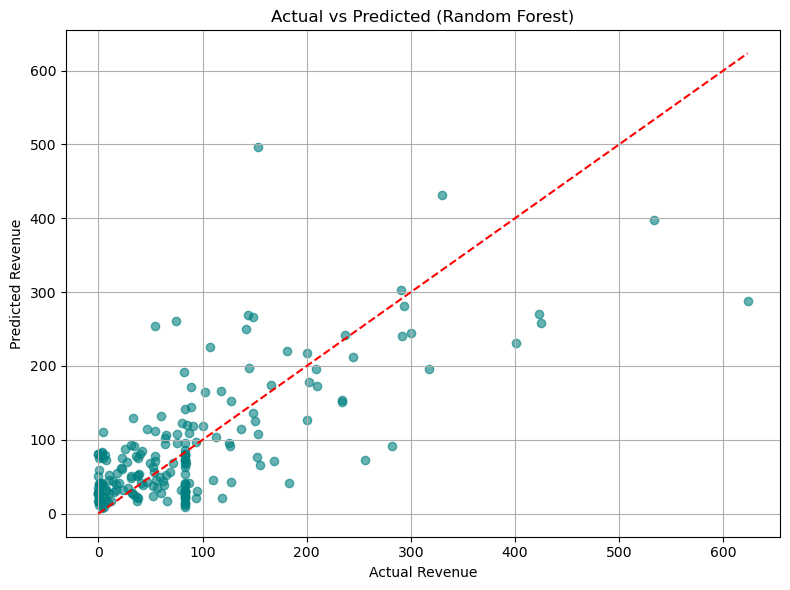

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


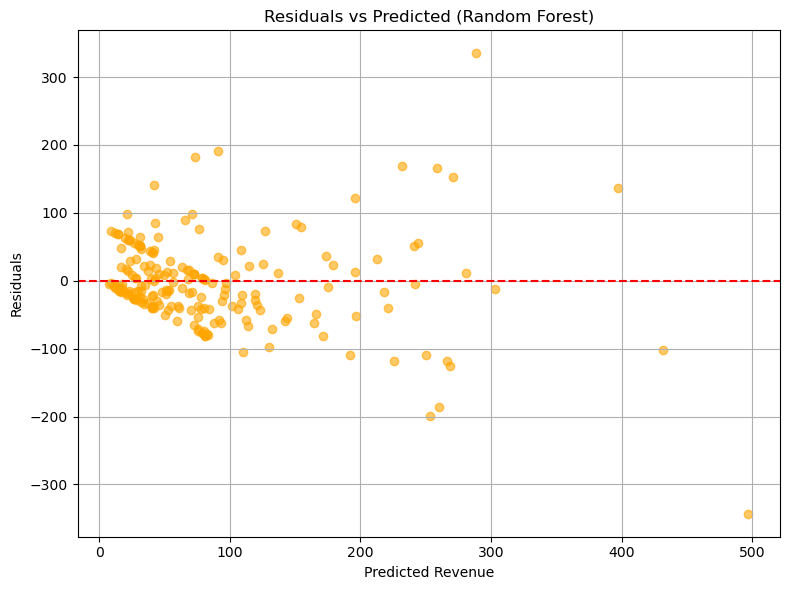

In [46]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, color='orange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


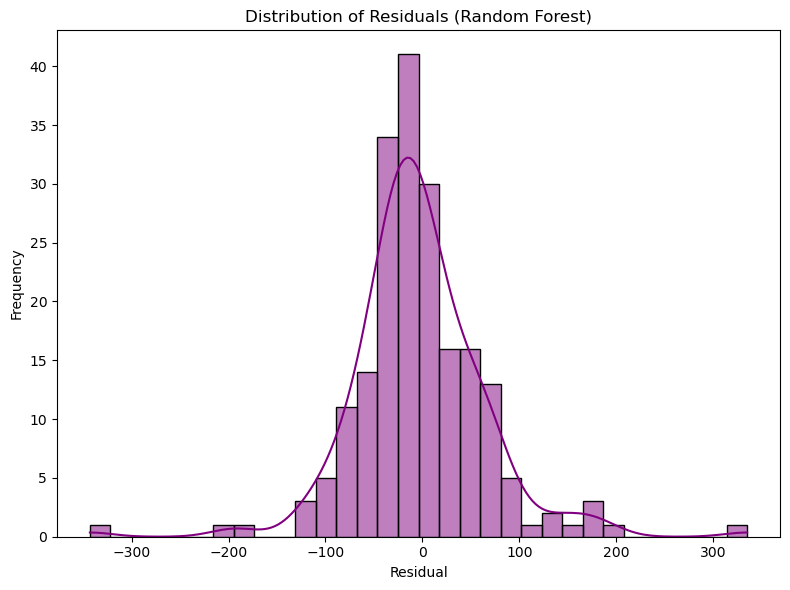

In [47]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='purple')
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# XGBoost

In [42]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create XGBoost pipeline
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Fit model
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate
print("XGBoost Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost Regressor Performance:
MAE: 45.96905469562722
RMSE: 67.48741193125963
R² Score: 0.5130467023822591


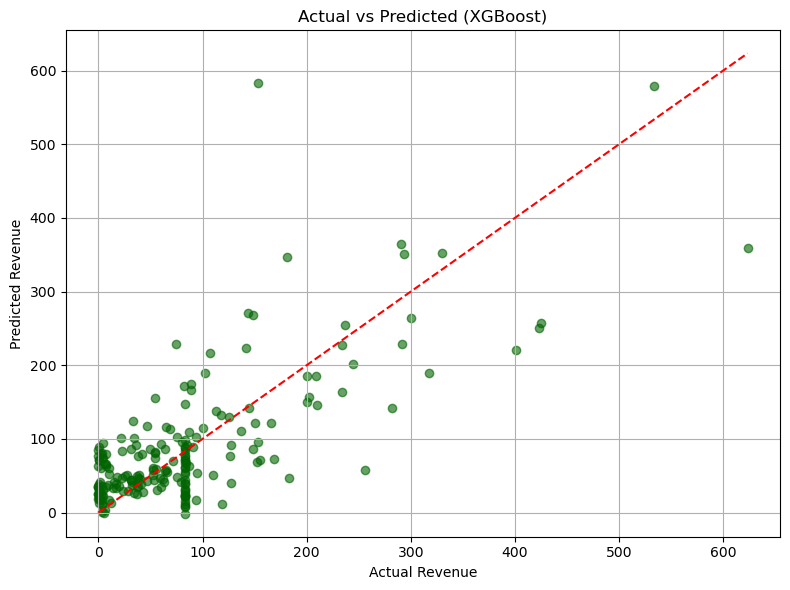

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='darkgreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted (XGBoost)')
plt.grid(True)
plt.tight_layout()
plt.show()


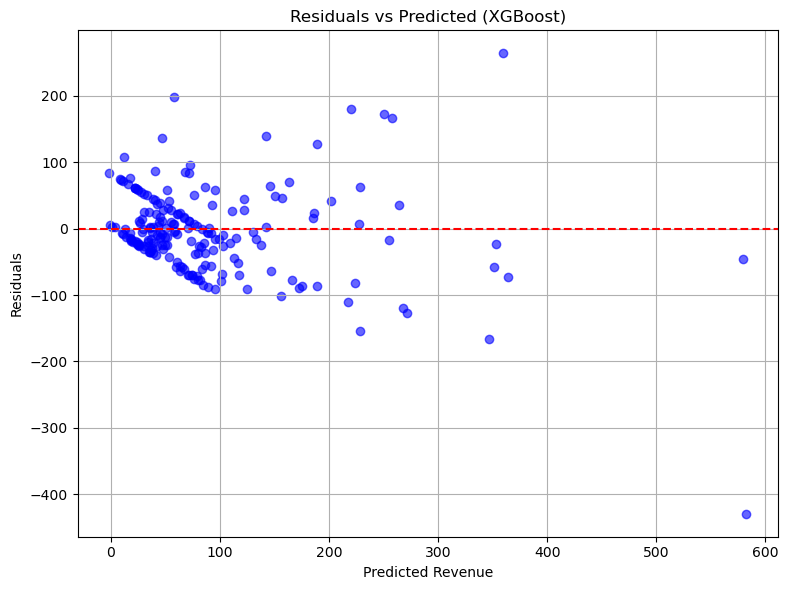

In [49]:
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xgb, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (XGBoost)')
plt.grid(True)
plt.tight_layout()
plt.show()


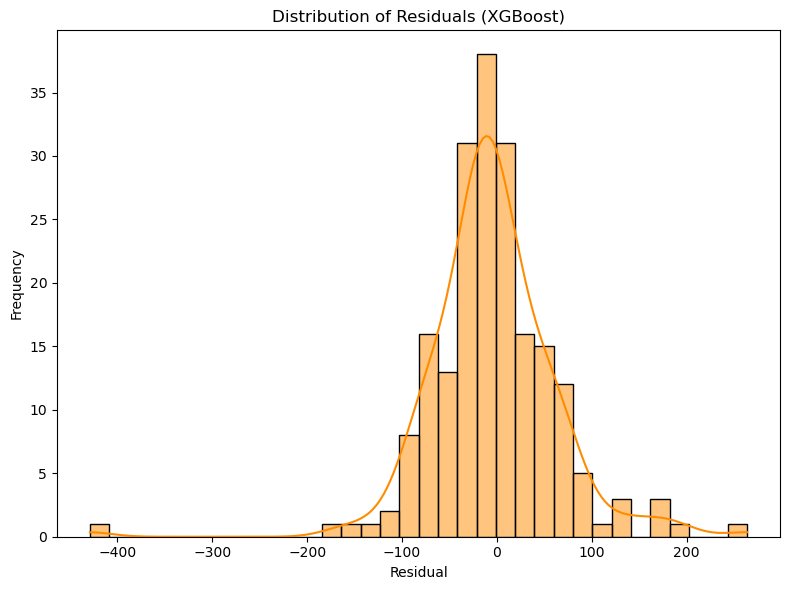

In [50]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgb, kde=True, color='darkorange')
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


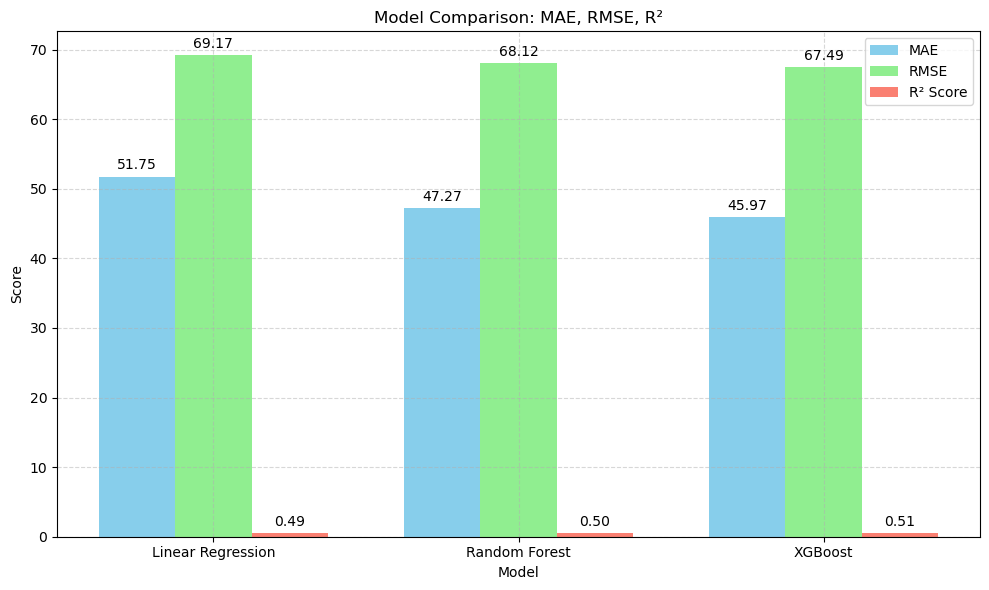

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

# Plot settings
x = np.arange(len(metrics['Model']))  # model indices
width = 0.25  # width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, metrics['MAE'], width, label='MAE', color='skyblue')
bars2 = ax.bar(x, metrics['RMSE'], width, label='RMSE', color='lightgreen')
bars3 = ax.bar(x + width, metrics['R2'], width, label='R² Score', color='salmon')

# Add labels and formatting
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: MAE, RMSE, R²')
ax.set_xticks(x)
ax.set_xticklabels(metrics['Model'])
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()
